In [1]:

import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [2]:
t = np.arange(0,100,.1)

In [3]:
x = np.array([np.cos(t),
             np.cos(t)*3,
             np.cos(t)*.5,])
#              np.sin(t),])
#              np.sin(t)*2,
#              np.sin(t) + np.cos(t)])

print(x.shape)

(3, 1000)


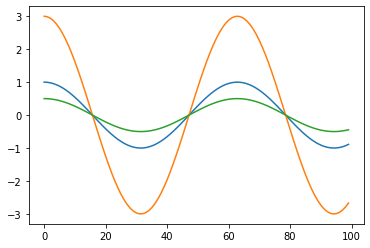

In [4]:
plt.plot(x.T[:100])

In [5]:
pca = PCA(n_components=2)
pca.fit(x)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [6]:
pca.explained_variance_ratio_

array([1.00000000e+00, 1.09361088e-32])

In [7]:
comp = pca.components_
print(comp.shape)

(2, 1000)


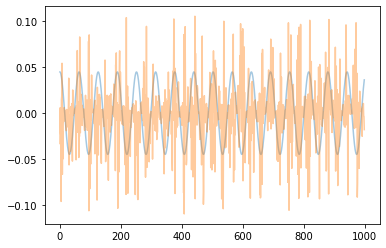

In [8]:
#print first comonent
plt.plot(comp.T,alpha=.4)

(3, 2)


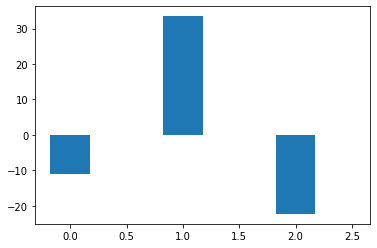

In [9]:
#Put it through, get *neuron factors* for current data
y = pca.transform(x)
print(y.shape)


n_ind = np.arange(y.shape[0])
width = 0.35

for lat_ind in range(y.shape[1]):
    
    plt.bar(n_ind + lat_ind*width, y[:,lat_ind],width)

# Now we recreate the data:

In [10]:
pca.get_params()

{'copy': True,
 'iterated_power': 'auto',
 'n_components': 2,
 'random_state': None,
 'svd_solver': 'auto',
 'tol': 0.0,
 'whiten': False}

# Now we try to use tensor component analysis in 2d case

In [12]:
import tensortools as tt

In [13]:
data = x# ... specify a numpy array holding the tensor you wish to fit

# Fit an ensemble of models, 4 random replicates / optimization runs per model rank
ensemble = tt.Ensemble(fit_method="ncp_hals")
ensemble.fit(data, ranks=range(1, 9), replicates=4)

fig, axes = plt.subplots(1, 2)
tt.plot_objective(ensemble, ax=axes[0])   # plot reconstruction error as a function of num components.
tt.plot_similarity(ensemble, ax=axes[1])  # plot model similarity as a function of num components.
fig.tight_layout()

# Plot the low-d factors for an example model, e.g. rank-2, first optimization run / replicate.
num_components = 2
replicate = 0
tt.plot_factors(ensemble.factors(num_components)[replicate])  # plot the low-d factors

plt.show()

ValueError: Array with X.ndim > 2 expected.